This dataset contains the marks secured by high school students from the United States.

In [1]:
# We need to install a wide variety of libraries. 
#For this we will install pandas, numpy, seaborn and matplotlib libraries.

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'


In [2]:
Performance_df = pd.read_csv('StudentsPerformance.csv')

In [3]:
#This shows an overhead view of the DataFrame
# see first 5 rows

Performance_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#This is used to check the number of rows and columns contained in the dataset

Performance_df.shape

(1000, 8)

In [5]:
#This helps to understand the statistical properties of the numerical variables in the dataframe

Performance_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Count : Shows the total number.

Mean : Shows the average.

Std : Standard deviation value

Min : Minimum value

%25 : First Quantile

%50 : Median or Second Quantile

%75 : Third Quantile

Max : Maximum value

Its output is mostly self-explanatory. 25%, 50% and 75% are the corresponding percentiles.

In [6]:
#This helps to understand each column and check out for missing values

# count null values
Performance_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Missing values in the dataset need to be checked and handled because it creates imbalanced observations, causes biased estimates, and in extreme cases, can even lead to invalid conclusions.

In [7]:
# showing cols names
for col in Performance_df.columns:
    print(col)

gender
race/ethnicity
parental level of education
lunch
test preparation course
math score
reading score
writing score


We should rename cols names, just make it as a `title` and `replace spaces with -`

In [8]:
# renaming columns names
Performance_df.columns = [col.title().replace(' ','_') for col in Performance_df.columns]

# new cols names
for col in Performance_df.columns:
    print(col)

Gender
Race/Ethnicity
Parental_Level_Of_Education
Lunch
Test_Preparation_Course
Math_Score
Reading_Score
Writing_Score


# 1. Univariate Visualization

Data Visualization is done to explore hidden trends/ patterns in data. It also aids better understanding of data. In this notebook, Matplotlib and Seaborn libraries are used.

Univariate analysis looks at one feature at a time.

When we analyze a feature independently, we are usually mostly interested in the distribution of its values and ignore other features in the dataset.

## 1.1 Quantitative features

Quantitative features take on ordered numerical values. Those values can be discrete, like integers, or continuous, like real numbers, and usually express a count or a measurement.

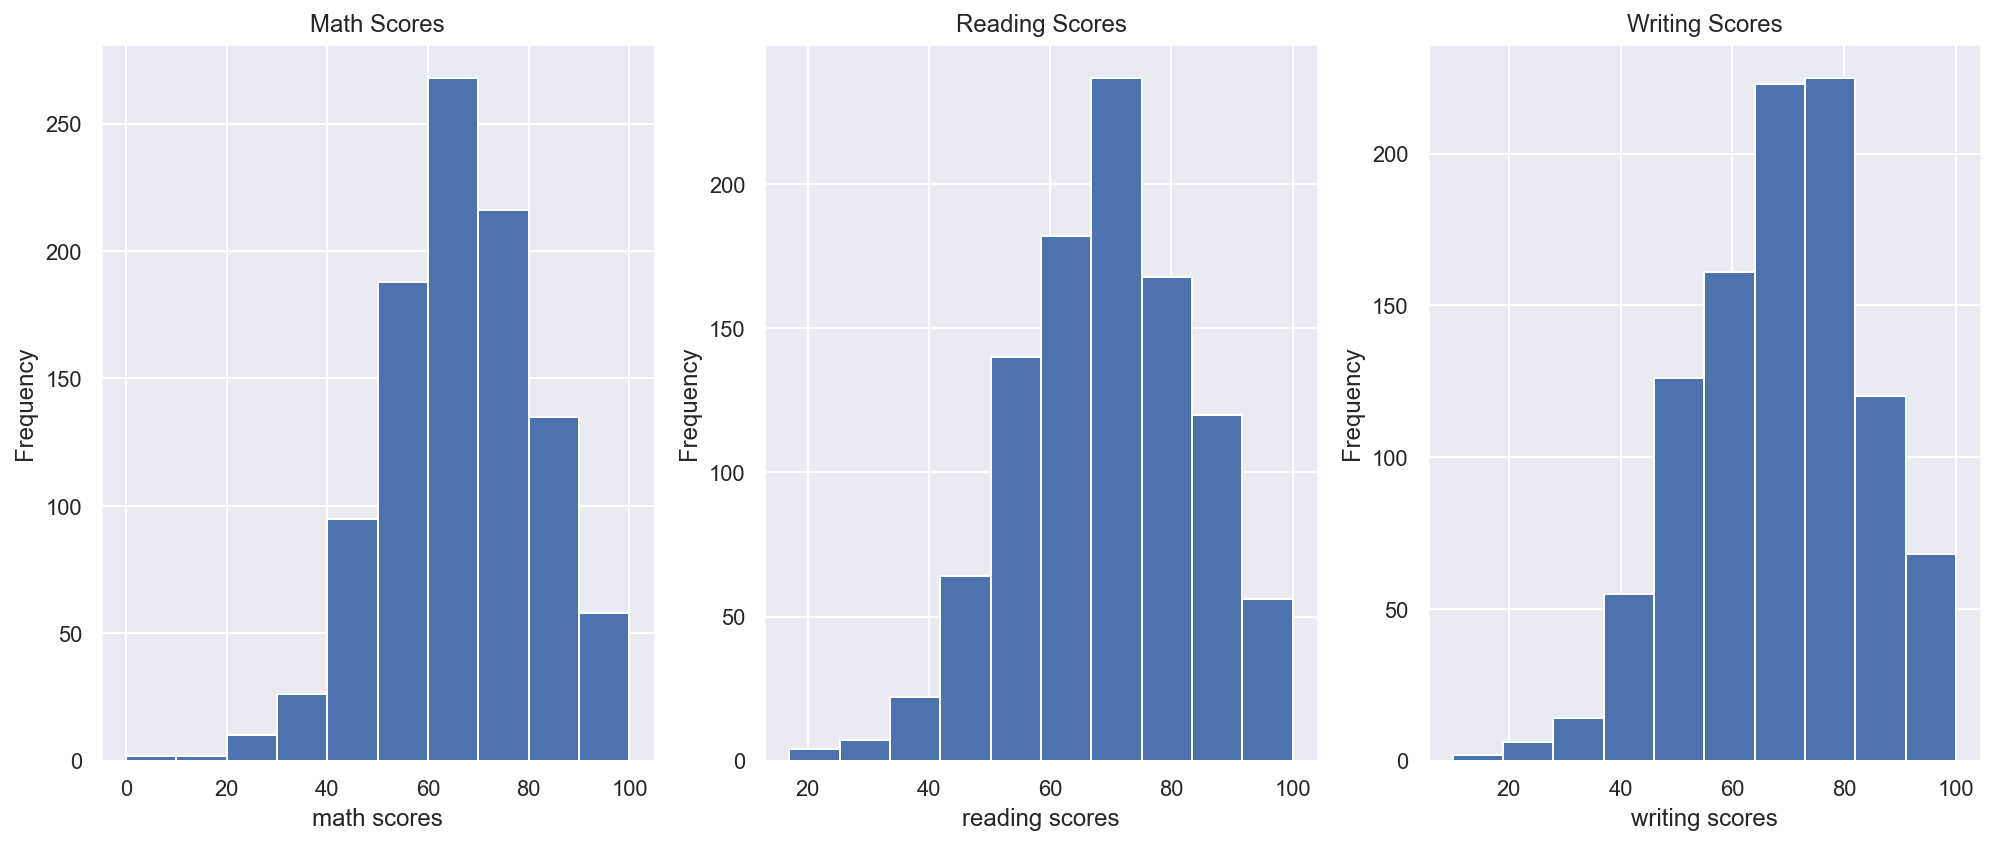

In [9]:
#This shows the class distribution of students performance in math, reading and writing respectively
plt.figure(figsize=(14,6))

plt.subplot(1, 3, 1)  #the figure has 1 row, 2 columns, and this plot is the first plot.
Performance_df['Math_Score'].plot(kind='hist')
plt.title('Math Scores')
plt.xlabel('math scores')
plt.tight_layout()

plt.subplot(1, 3, 2)
Performance_df['Reading_Score'].plot(kind='hist')
plt.title('Reading Scores')
plt.xlabel('reading scores')
plt.tight_layout()

plt.subplot(1, 3, 3)
Performance_df['Writing_Score'].plot(kind='hist')
plt.title('Writing Scores') 
plt.xlabel('writing scores')
plt.tight_layout()

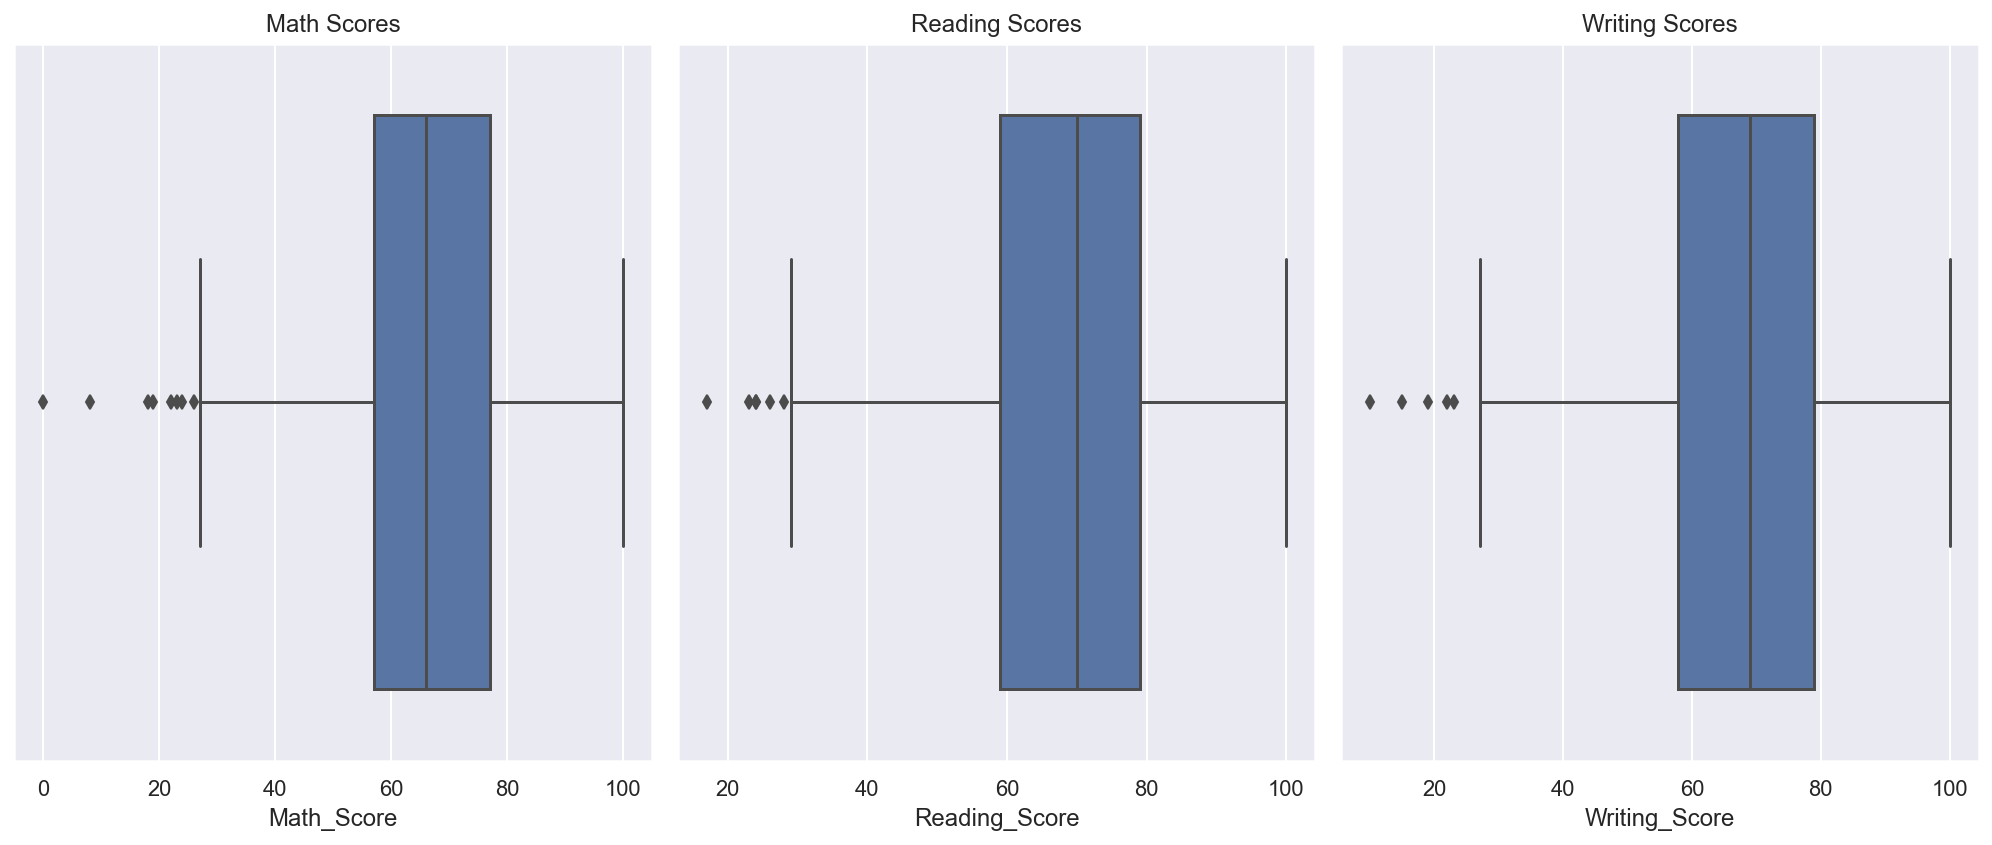

In [10]:
#This shows the statistical analysis of students performance in math , reading and writing respectively. 

plt.figure(figsize=(14,6))

plt.subplot(1, 3, 1)  #the figure has 1 row, 2 columns, and this plot is the first plot.
sns.boxplot(data= Performance_df, x= 'Math_Score')
plt.title('Math Scores')
plt.tight_layout()

plt.subplot(1, 3, 2)
sns.boxplot(data= Performance_df, x= 'Reading_Score')
plt.title('Reading Scores')
plt.tight_layout()

plt.subplot(1, 3, 3)
sns.boxplot(data= Performance_df, x= 'Writing_Score')
plt.title('Writing Scores') 
plt.tight_layout()

The box plot comprises of;

1. a box - this illustrates the interquartile spread of the distribution; its length is determined by the  25𝑡ℎ(Q1)  and  75𝑡ℎ(Q3)  percentiles. The vertical line inside the box marks the median ( 50% ) of the distribution)

2. whiskers - `whiskers are the lines extending from the box`. It represents the entire scatter of data points, specifically the points that fall within the interval  (Q1−1.5⋅IQR,Q3+1.5⋅IQR) , where  `IQR=Q3−Q1`  is the `interquartile range`

3. outliers - An outlier is a data point that differs significantly from the majority of the data taken from a sample or population.

<AxesSubplot:xlabel='Writing_Score', ylabel='Count'>

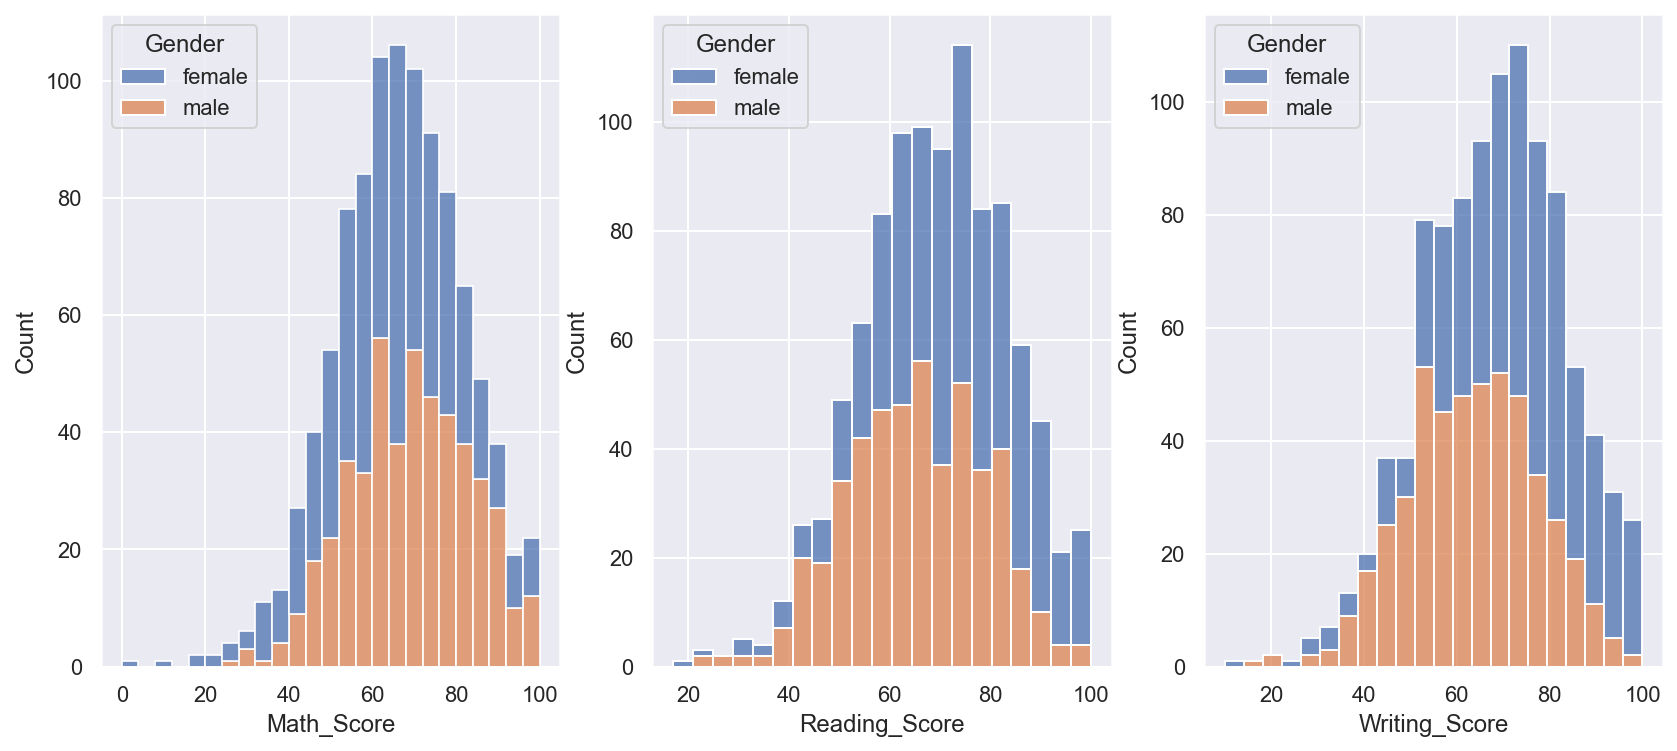

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(14, 6))

sns.histplot(data= Performance_df, x= 'Math_Score', hue= 'Gender', multiple= 'stack', ax=ax1)
sns.histplot(data= Performance_df, x= 'Reading_Score', hue= 'Gender', multiple= 'stack', ax=ax2)
sns.histplot(data= Performance_df, x= 'Writing_Score', hue= 'Gender', multiple= 'stack', ax=ax3)

The plot above shows that in all courses, Females get high scores compared to the males. 

In [12]:
Math_filtered = Performance_df.query('Math_Score > 80')
Reading_filtered =Performance_df.query('Reading_Score > 80')
Writing_filtered =Performance_df.query('Writing_Score > 80')

Math_stat = Math_filtered.groupby('Gender')['Math_Score'].count()
Reading_stat = Reading_filtered.groupby('Gender')['Reading_Score'].count()
Writing_stat = Writing_filtered.groupby('Gender')['Writing_Score'].count()

print(Math_stat)
print(Reading_stat)
print(Writing_stat)

Gender
female     68
male      108
Name: Math_Score, dtype: int64
Gender
female    159
male       76
Name: Reading_Score, dtype: int64
Gender
female    154
male       54
Name: Writing_Score, dtype: int64


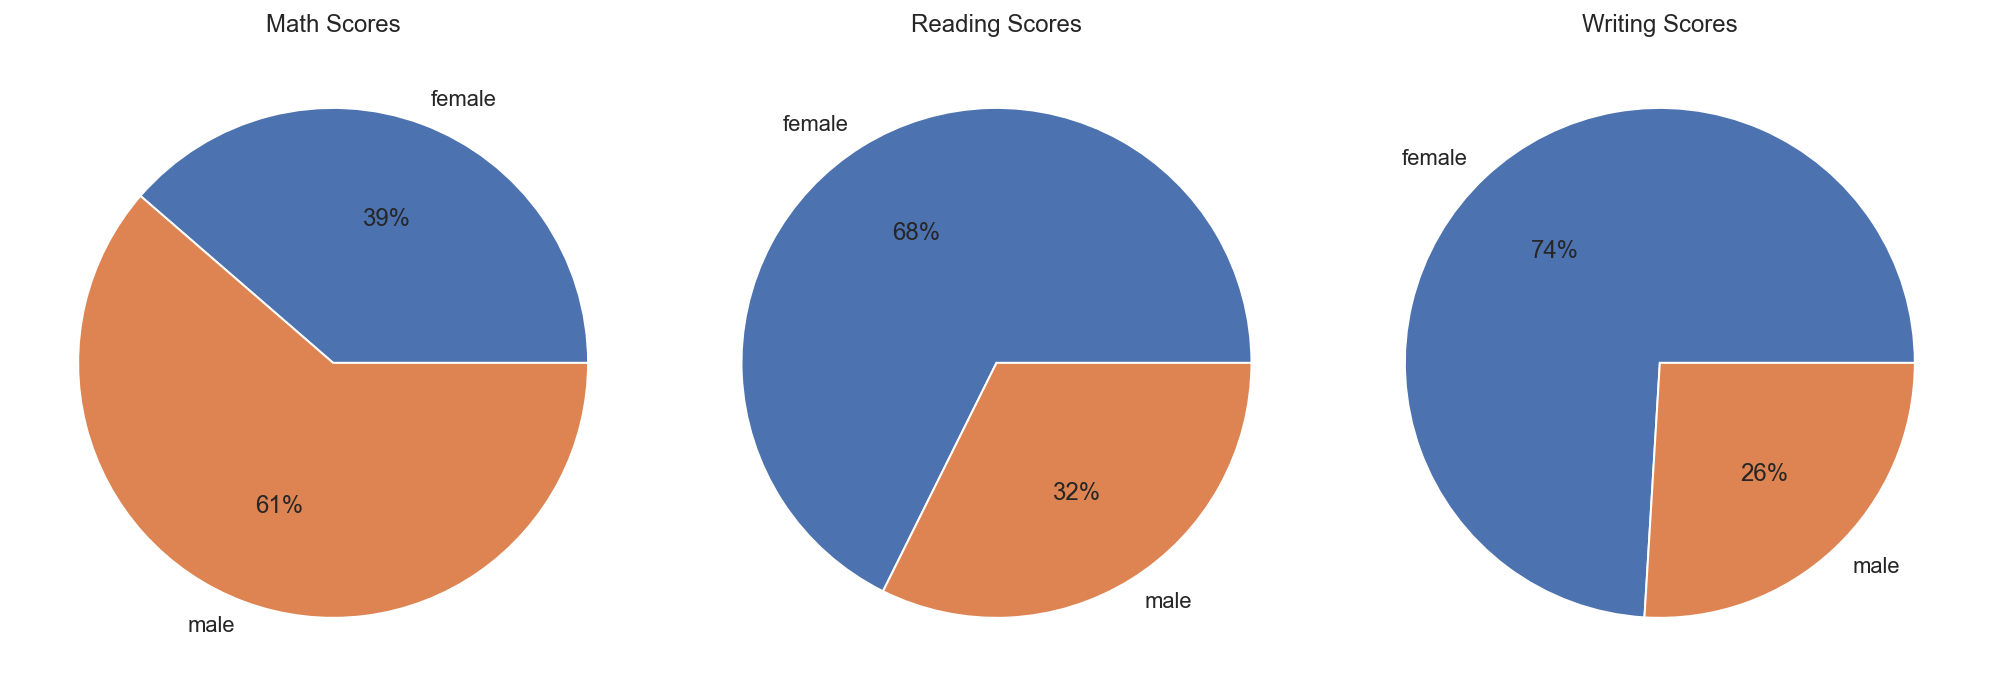

In [13]:
plt.figure(figsize=(14,6))

plt.subplot(1, 3, 1)  #the figure has 1 row, 2 columns, and this plot is the first plot.
Math_stat.plot(kind = 'pie', autopct = "%.0f%%")
plt.title('Math Scores')
plt.ylabel('')
plt.tight_layout()

plt.subplot(1, 3, 2)
Reading_stat.plot(kind = 'pie', autopct = "%.0f%%")
plt.title('Reading Scores')
plt.ylabel('')
plt.tight_layout()

plt.subplot(1, 3, 3)
Writing_stat.plot(kind = 'pie', autopct = "%.0f%%")
plt.title('Writing Scores')
plt.ylabel('')
plt.tight_layout()

From the analysis above, we can say that a larger number of males scored more than 80% in mathematics compared to the fenales while larger number of females scored more than 80% in Reading and Writing.

## 1.2 Qualitative(Categorical / Binary) features

Categorical features take on a fixed number of values. Each of these values assigns an observation to a corresponding group, known as a category, which reflects some qualitative property of this example.

Binary variables are an important special case of categorical variables when the number of possible values is exactly 2. If the values of a categorical variable are ordered, it is called ordinal.

In [14]:
#Frequency table
categorical_features = ['Gender', 'Race/Ethnicity', 'Parental_Level_Of_Education'
           , 'Lunch', 'Test_Preparation_Course']

for col in categorical_features:
    print('-'*50)
    print(f'The column name is: {col}')
    print(Performance_df[col].value_counts())

--------------------------------------------------
The column name is: Gender
female    518
male      482
Name: Gender, dtype: int64
--------------------------------------------------
The column name is: Race/Ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: Race/Ethnicity, dtype: int64
--------------------------------------------------
The column name is: Parental_Level_Of_Education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: Parental_Level_Of_Education, dtype: int64
--------------------------------------------------
The column name is: Lunch
standard        645
free/reduced    355
Name: Lunch, dtype: int64
--------------------------------------------------
The column name is: Test_Preparation_Course
none         642
completed    358
Name: Test_Preparation_Course, dtype: int64


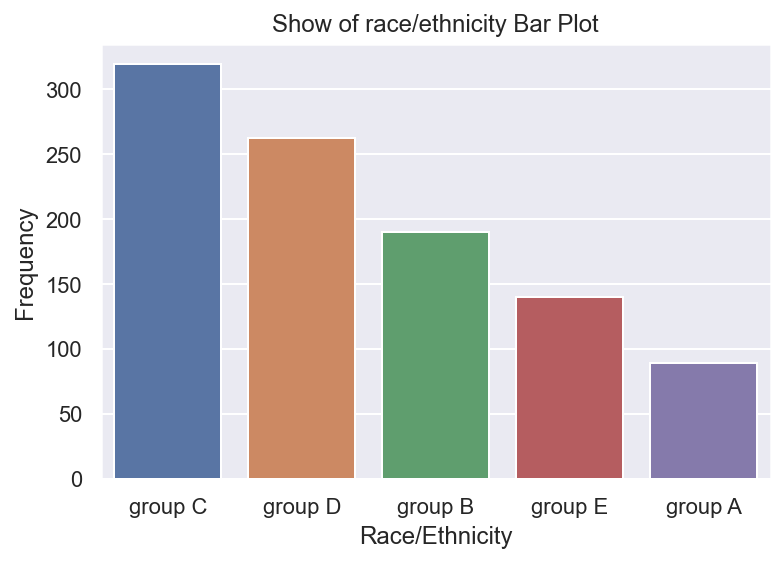

In [15]:
sns.barplot(x= Performance_df['Race/Ethnicity'].value_counts().index,
           y= Performance_df['Race/Ethnicity'].value_counts().values)

plt.xlabel('Race/Ethnicity')
plt.ylabel('Frequency')
plt.title('Show of race/ethnicity Bar Plot')
plt.show();


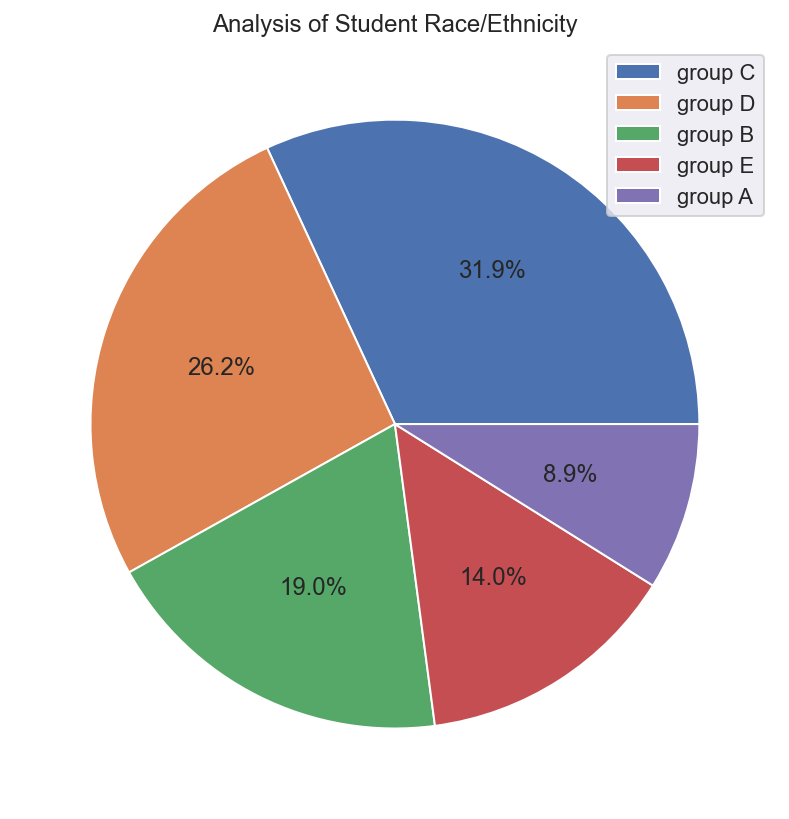

In [16]:
labels=Performance_df['Race/Ethnicity'].value_counts().index
values=Performance_df['Race/Ethnicity'].value_counts().values

plt.figure(figsize=(7,7))
plt.pie(values, autopct='%1.1f%%')
plt.title('Analysis of Student Race/Ethnicity')
plt.legend(labels, loc='best')
plt.show()

From the analysis above, 31.9% of students in the class belong to ethnic group C

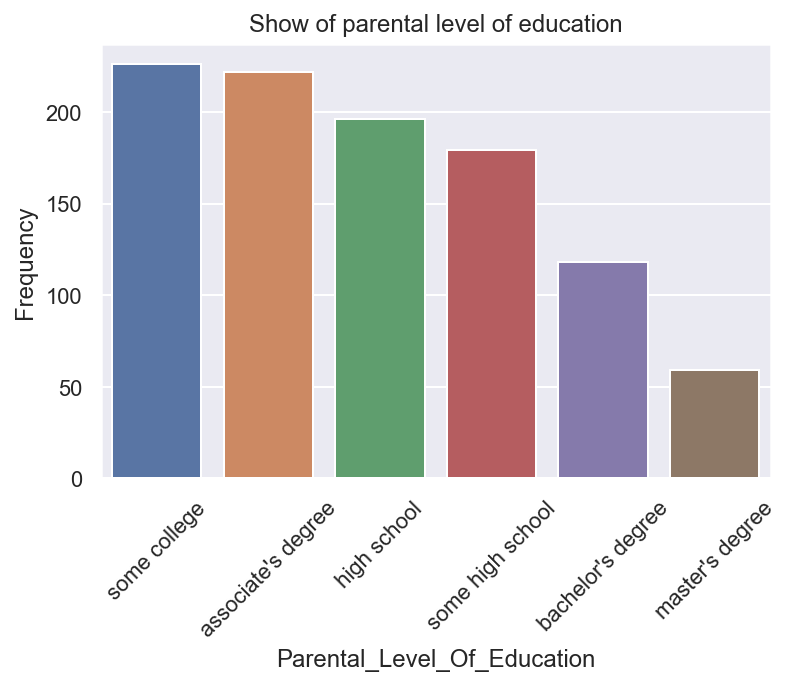

In [17]:
sns.barplot(x= Performance_df['Parental_Level_Of_Education'].value_counts().index,
           y= Performance_df['Parental_Level_Of_Education'].value_counts().values)

plt.xticks(rotation= 45)

plt.xlabel('Parental_Level_Of_Education')
plt.ylabel('Frequency')
plt.title('Show of parental level of education')
plt.show();

Only 5.9% of the parents have attained a Masters Degree. A larger percent of parents have some college or associate degree.

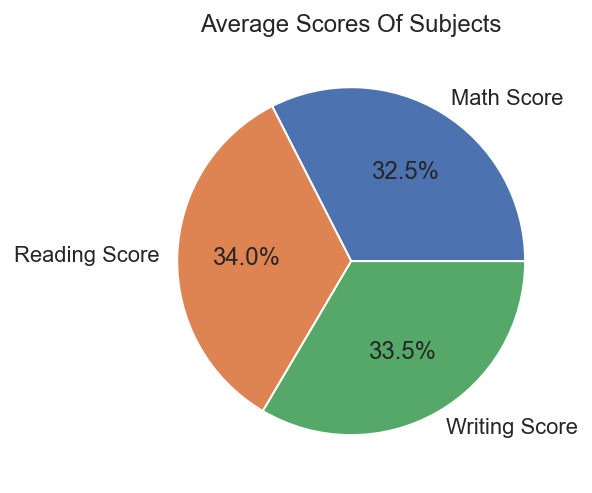

In [18]:
labels=['Math Score', 'Reading Score', 'Writing Score']
values=[Performance_df['Math_Score'].mean(),Performance_df['Reading_Score'].mean(),Performance_df['Writing_Score'].mean()]


plt.figure(figsize=(4,4))
plt.pie(values, labels= labels, autopct='%1.1f%%')
plt.title('Average Scores Of Subjects')
plt.show();

## 2. Multivariate visualization
Multivariate plots allow us to see relationships between two and more different variables

**Correlation matrix**
Let's look at the correlations among the numerical variables in our dataset. This information is important to know as there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.

First, we will use the method corr() on a DataFrame that calculates the correlation between each pair of features. Then, we pass the resulting correlation matrix to heatmap() from seaborn, which renders a color-coded matrix for the provided values

In [19]:
corr = Performance_df.corr()

corr

,Math_Score,Reading_Score,Writing_Score
Math_Score,1.000000,0.817580,0.802642
Reading_Score,0.817580,1.000000,0.954598
Writing_Score,0.802642,0.954598,1.000000


Text(0.5, 1.0, '2D-Heat Map showing correlation of math, reading and writing scores')

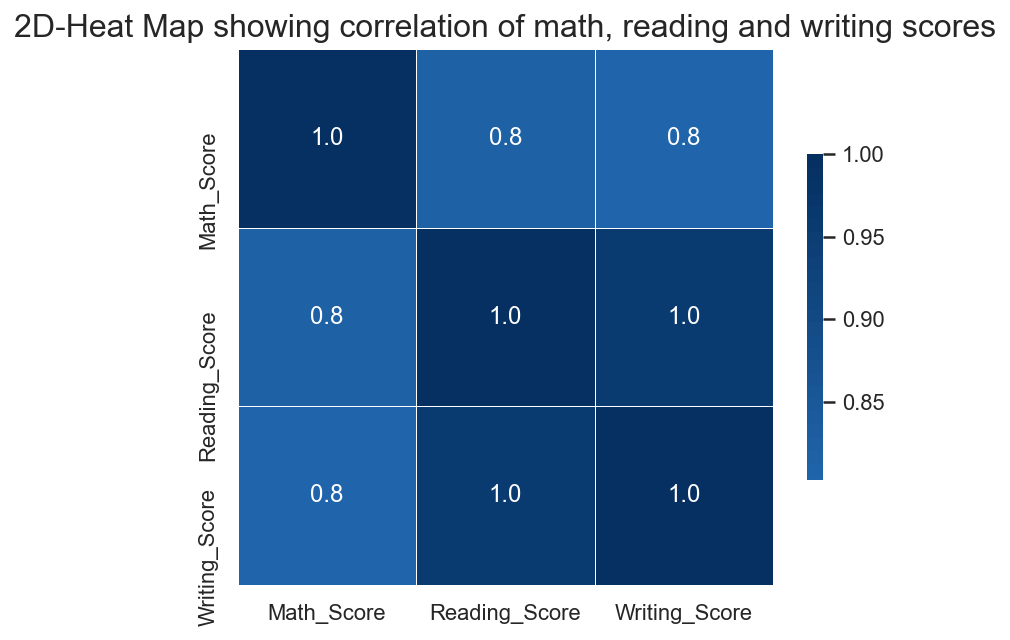

In [57]:
fig = plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, fmt='.1f',square=True, center=0, linewidths=.5, cmap="RdBu", cbar_kws={"shrink": .5});
plt.title("2D-Heat Map showing correlation of math, reading and writing scores", size=16)

We see that Reading scores and writing scores have total positive linear correlation.

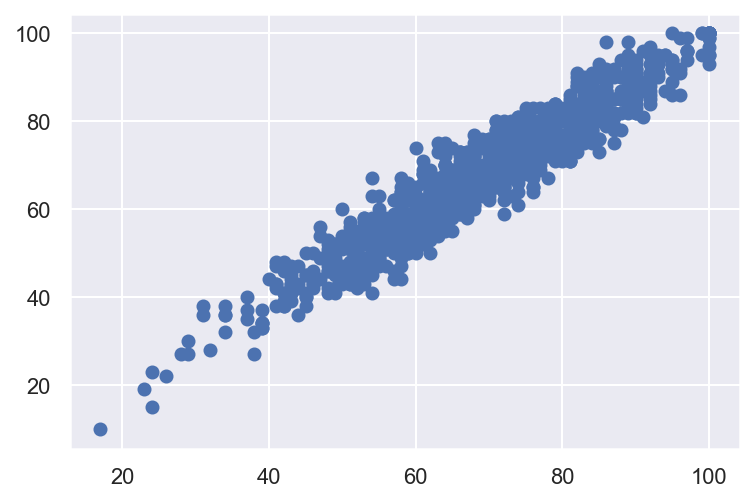

In [22]:
plt.scatter(Performance_df['Reading_Score'], Performance_df['Writing_Score']);

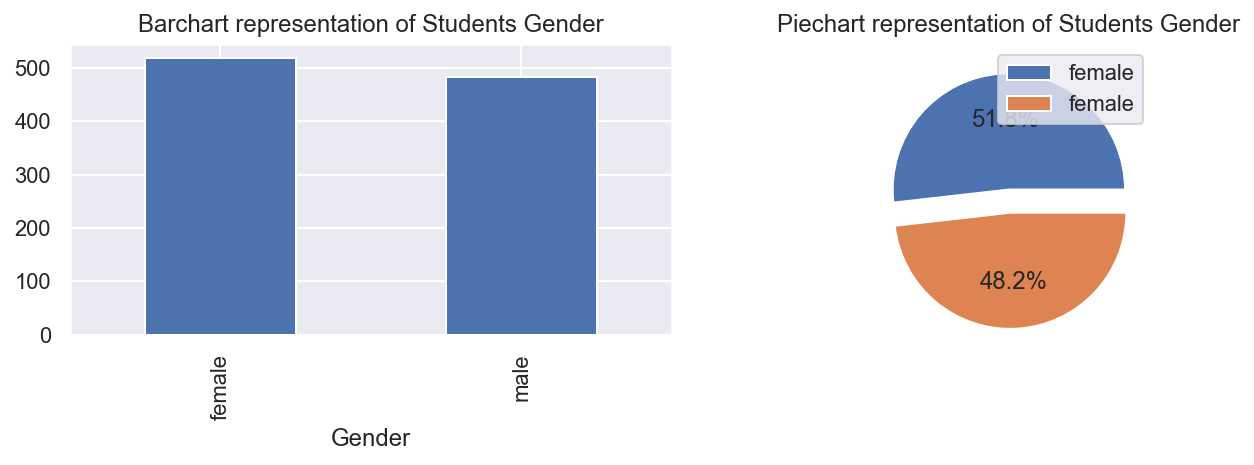

In [21]:
#This reveals the Gender statistics of class population

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

gender = Performance_df['Gender'].value_counts()
gender.plot(kind='bar', ax=ax1, x='Gender', title='Barchart representation of Students Gender')
ax1.set_xlabel('Gender')

explode = [0, 0.2]
ax2.pie(gender, autopct='%1.1f%%', explode=explode)
ax2.set_title('Piechart representation of Students Gender')
ax2.legend(Performance_df['Gender'], loc="upper right")

plt.tight_layout(pad=3.0)

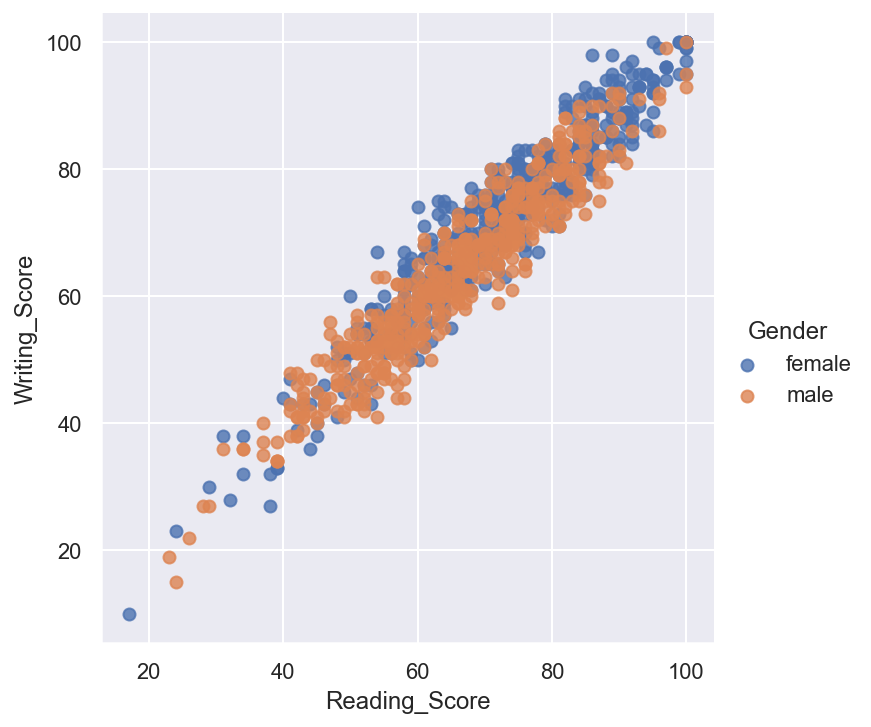

In [23]:
sns.lmplot(data= Performance_df, x= 'Reading_Score', 
          y= 'Writing_Score', hue= 'Gender', fit_reg= False);

From the analysis above, A larger number of the student population are females.

Text(0, 0.5, '')

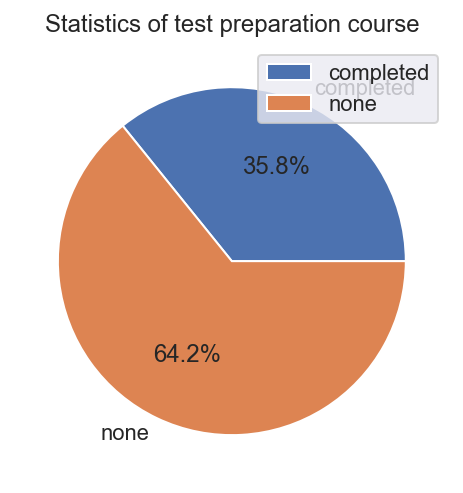

In [24]:
fig, ax = plt.subplots(figsize=(10, 4))

state2 = Performance_df['Test_Preparation_Course'].unique()
state2.sort()
Performance_df.groupby('Test_Preparation_Course').size().plot(kind='pie', autopct='%1.1f%%', title='Statistics of test preparation course')
ax.legend(state2, loc='best')
ax.set_ylabel('')

Majority of the students(64.2%) did not attend the test preparation course.

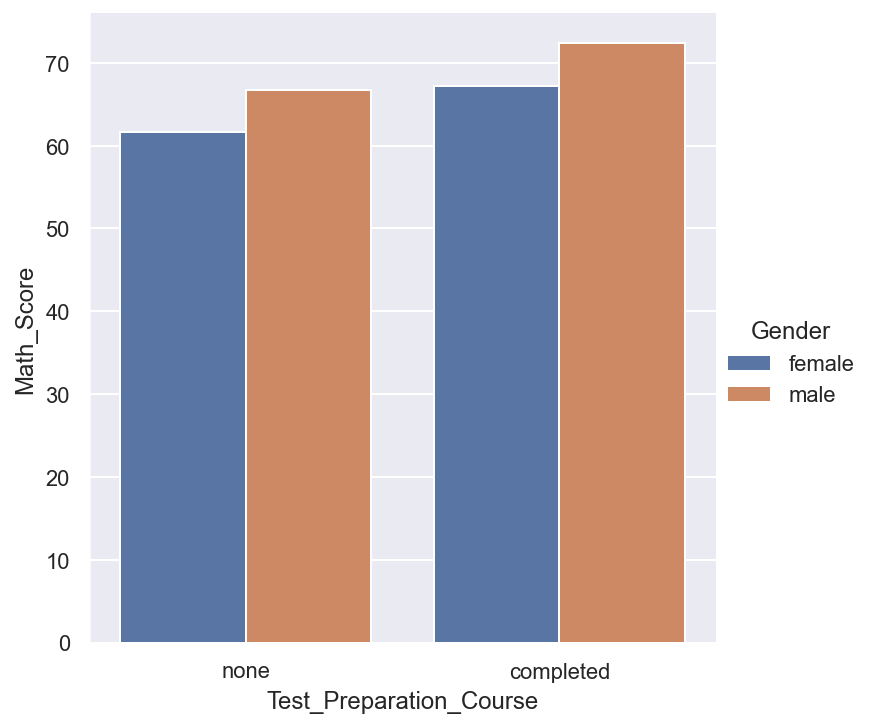

In [61]:
#Used to show the relationship between a numerical and one or more categorical variables using one of several visual representations.
sns.catplot(data= Performance_df, y= 'Math_Score',
            x= 'Test_Preparation_Course',
            hue= 'Gender',
            kind= 'bar',ci= None);

From the chart above, we can say that the test preparation course was helpful since the student with the highest score in mathematics completed the course.

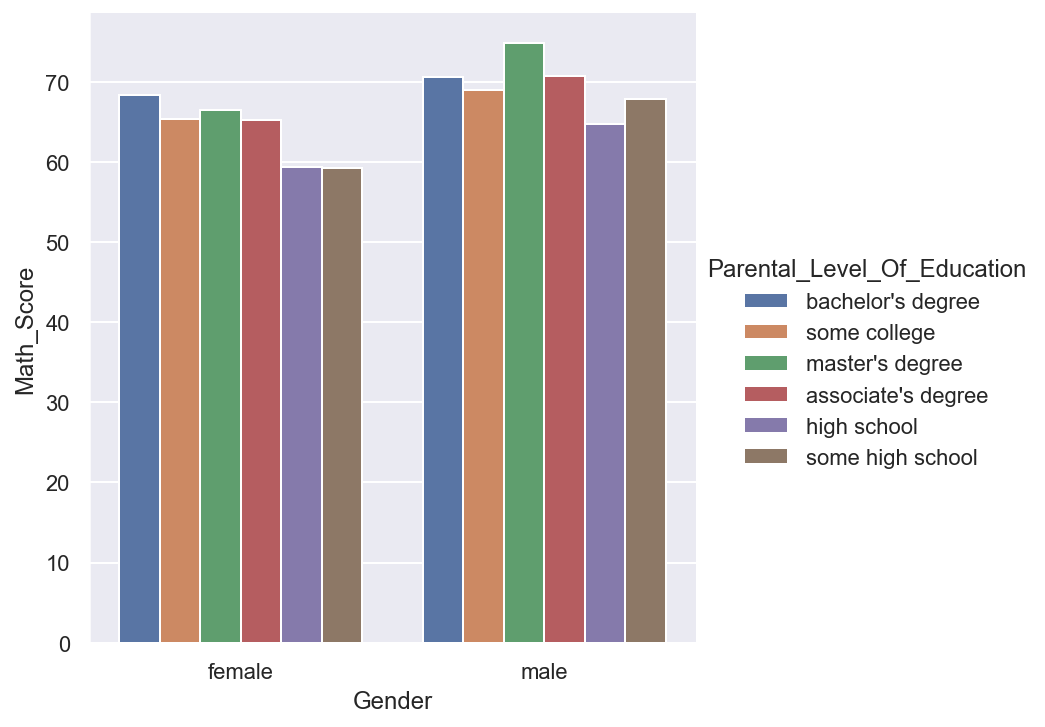

In [25]:
sns.catplot(data= Performance_df, y= 'Math_Score',
            x= 'Gender',
            hue= 'Parental_Level_Of_Education',
            kind= 'bar',ci= None);

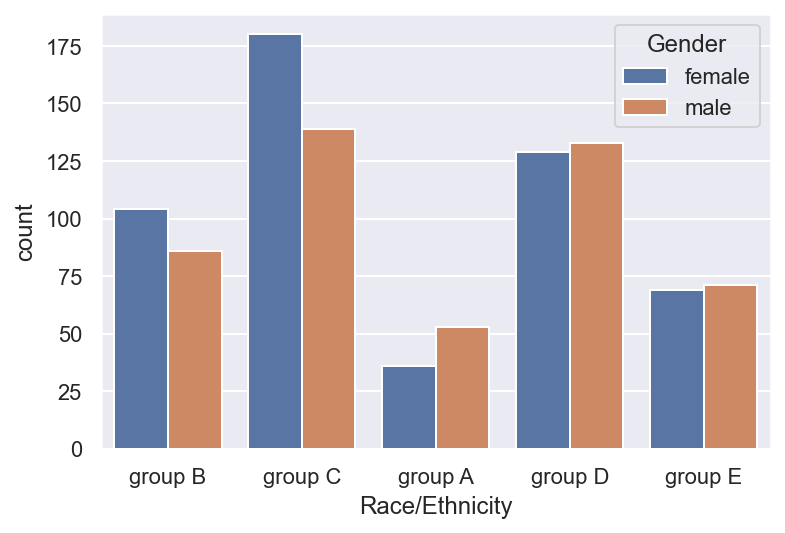

In [26]:
sns.countplot(data= Performance_df,x='Race/Ethnicity',hue= 'Gender');

#### Contingency table "cross tabulation"

It shows a multivariate frequency distribution of categorical variables in tabular form. 

In [27]:
pd.crosstab(Performance_df['Race/Ethnicity'], Performance_df['Gender']).T

Race/Ethnicity,group A,group B,group C,group D,group E
Gender,,,,,
female,36,104,180,129,69
male,53,86,139,133,71


In [28]:
pd.crosstab(Performance_df['Parental_Level_Of_Education'], Performance_df['Gender']).T

Parental_Level_Of_Education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
Gender,,,,,,
female,116,63,94,36,118,91
male,106,55,102,23,108,88


**How many students passed Mathematics Exam? (above 50)**

We will calculate each student will pass in each exam by make a passmark as an indicator of success and categorize each student within all exam by GPA

we will set the minimum marks to 50 to pass in a exam

In [29]:
passmark = 50

Performance_df['Pass_Math_Exam'] = (Performance_df['Math_Score'] > passmark).map({True: "P",
                                                     False: "F"})

Performance_df['Pass_Math_Exam'].value_counts()

P    850
F    150
Name: Pass_Math_Exam, dtype: int64

Text(0, 0.5, '')

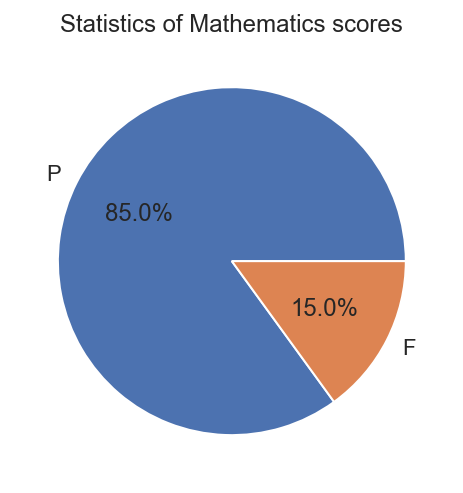

In [30]:
Performance_df['Pass_Math_Exam'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Statistics of Mathematics scores')

plt.ylabel('')

From the chart above, we can see that 85% of the student passed mathematics(i.e above 50) while 15% failed.

**How many students passed Reading Exam? (above 50)**

In [31]:
Performance_df['Pass_Reading_Exam'] = (Performance_df['Reading_Score'] > passmark).map({True: "P",
                                                     False: "F"})

Performance_df['Pass_Reading_Exam'].value_counts()

P    903
F     97
Name: Pass_Reading_Exam, dtype: int64

Text(0, 0.5, '')

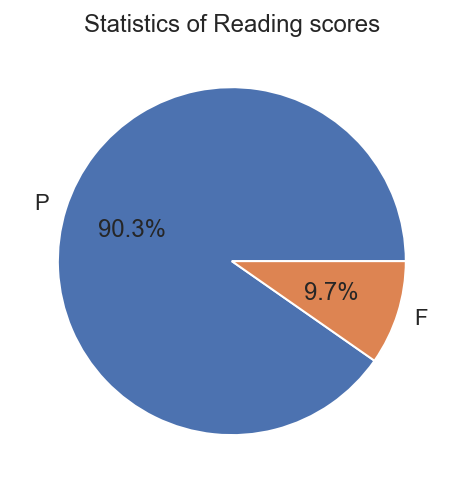

In [33]:
Performance_df['Pass_Reading_Exam'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Statistics of Reading scores')

plt.ylabel('')

From the chart above, we can see that 90.3% of the student passed Reading exam(i.e above 50) while 9.7% failed.

**How many students passed Writing Exam? (above 50)**

In [34]:
Performance_df['Pass_Writing_Exam'] = (Performance_df['Writing_Score'] > passmark).map({True: "P",
                                                     False: "F"})

Performance_df['Pass_Writing_Exam'].value_counts()

P    876
F    124
Name: Pass_Writing_Exam, dtype: int64

Text(0, 0.5, '')

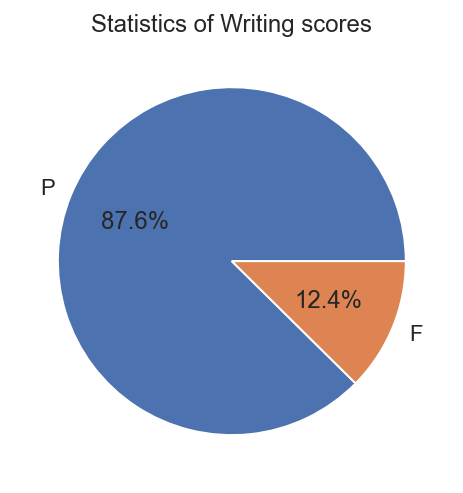

In [35]:
Performance_df['Pass_Writing_Exam'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Statistics of Writing scores')

plt.ylabel('')

From the chart above, we can see that 87.6% of the student passed Reading exam(i.e above 50) while 12.4% failed.

**How many students pass in all exams?**

In [38]:
Performance_df['Overall_Passed'] = Performance_df.apply(lambda df:
                                    'Passed_all' if df['Pass_Math_Exam'] == 'P' 
                                    and df['Pass_Reading_Exam']  == 'P' 
                                    and df['Pass_Writing_Exam']  == 'P' 
                                    else 'Less_than_3_passes',
                                    axis=1)
Performance_df['Overall_Passed'].value_counts()


Passed_all            796
Less_than_3_passes    204
Name: Overall_Passed, dtype: int64

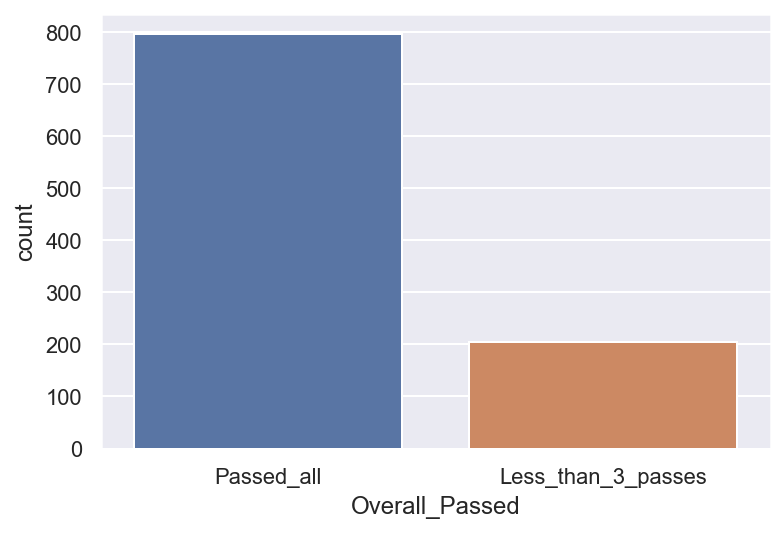

In [40]:
sns.countplot(data=Performance_df, x= 'Overall_Passed');


From the chart above, we can say that about 75% of the student passed the three exams.

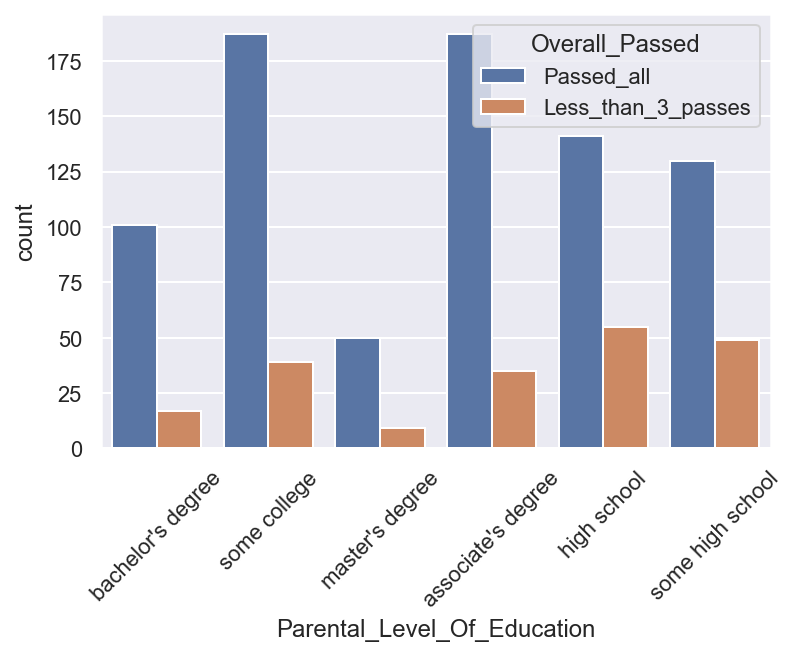

In [41]:
sns.countplot(data= Performance_df, hue= 'Overall_Passed',
             x= 'Parental_Level_Of_Education')
plt.xticks(rotation= 45);

From the chart above, we can say that the parent level of education does not determine the student performance.

In [42]:
pd.crosstab(Performance_df['Parental_Level_Of_Education'], Performance_df['Overall_Passed']).T

Parental_Level_Of_Education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
Overall_Passed,,,,,,
Less_than_3_passes,35,17,55,9,39,49
Passed_all,187,101,141,50,187,130


**GPA of Students**

In [43]:
Performance_df['Total_Marks'] = Performance_df['Math_Score'] + Performance_df['Reading_Score'] + Performance_df['Writing_Score']
Performance_df['Percentage'] = Performance_df['Total_Marks'] / 3.0
Performance_df.head()

,Gender,Race/Ethnicity,Parental_Level_Of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score,Pass_Math_Exam,Pass_Reading_Exam,Pass_Writing_Exam,Overall_Passed,Total_Marks,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,Passed_all,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,P,P,P,Passed_all,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,Passed_all,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,P,F,Less_than_3_passes,148,49.333333
4,male,group C,some college,standard,none,76,78,75,P,P,P,Passed_all,229,76.333333


**Assigning the GPA to each Student**

|  GPA  | Grad |
|-------|------|
| **A** | > 80 |
| **B** | > 70 | 
| **C** | > 60 |
| **D** | > 50 | 
| **F** | < 50 |

In [44]:
def GetGrade(Percentage):
    if Percentage >= 80:
        return 'A'
    elif Percentage >= 70:
        return 'B'
    elif Percentage >= 60:
        return 'C'
    elif Percentage >= 50:
        return 'D'
    else:
        return 'F'

In [45]:
Performance_df['GPA'] = Performance_df.apply(lambda df : GetGrade(df['Percentage']), axis= 1)
Performance_df.head() 

,Gender,Race/Ethnicity,Parental_Level_Of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score,Pass_Math_Exam,Pass_Reading_Exam,Pass_Writing_Exam,Overall_Passed,Total_Marks,Percentage,GPA
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,Passed_all,218,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,P,P,P,Passed_all,247,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,Passed_all,278,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,P,F,Less_than_3_passes,148,49.333333,F
4,male,group C,some college,standard,none,76,78,75,P,P,P,Passed_all,229,76.333333,B


In [52]:
General_Performance = Performance_df['GPA'].value_counts().to_frame()

General_Performance

,GPA
B,261
C,256
A,198
D,182
F,103


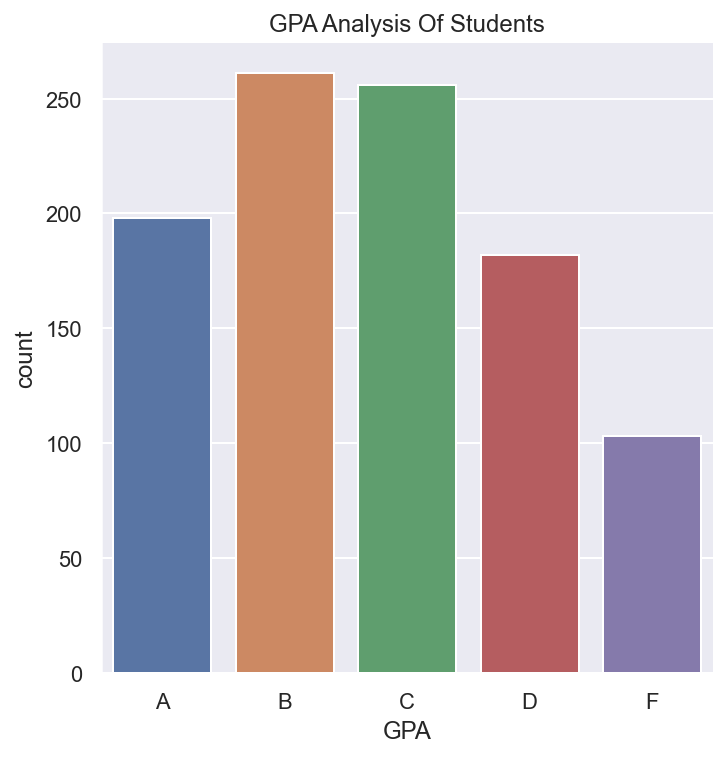

In [54]:
GPA_Order = list("ABCDF")
sns.catplot(data= Performance_df, x= 'GPA',order= GPA_Order, kind= 'count');
plt.title('GPA Analysis Of Students');

From the chart, we see that majority of the class had an average GPA of B and C